In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

dataset_path = 'C:/Desktop/MLOps/country_wise_latest.csv'
data = pd.read_csv(dataset_path)

numeric_data = data.select_dtypes(include=[np.number])
numeric_data.fillna(numeric_data.median(), inplace=True)
numeric_data.replace([np.inf, -np.inf], np.nan, inplace=True)
numeric_data.dropna(inplace=True)
data[numeric_data.columns] = numeric_data

data = data.dropna(subset=['Deaths'])
y = data['Deaths']

features = ['Confirmed', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 
            'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 
            'Confirmed last week', '1 week change', '1 week % increase']

X = data[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model = DecisionTreeRegressor(random_state=1)
model.fit(train_X, train_y)

train_predictions = model.predict(train_X)
val_predictions = model.predict(val_X)

train_mae = mean_absolute_error(train_predictions, train_y)
val_mae = mean_absolute_error(val_predictions, val_y)

print(f"Training MAE: {train_mae:.2f}")
print(f"Validation MAE: {val_mae:.2f}")

if train_mae > val_mae:
    print("Model might be underfitting.")
elif train_mae < val_mae:
    if val_mae - train_mae > 0.1 * train_mae:  
        print("Model might be overfitting.")
    else:
        print("Model seems to be generalizing well.")
else:
    print("Model has equal performance on both training and validation sets.")

Training MAE: 0.00
Validation MAE: 3499.87
Model might be overfitting.


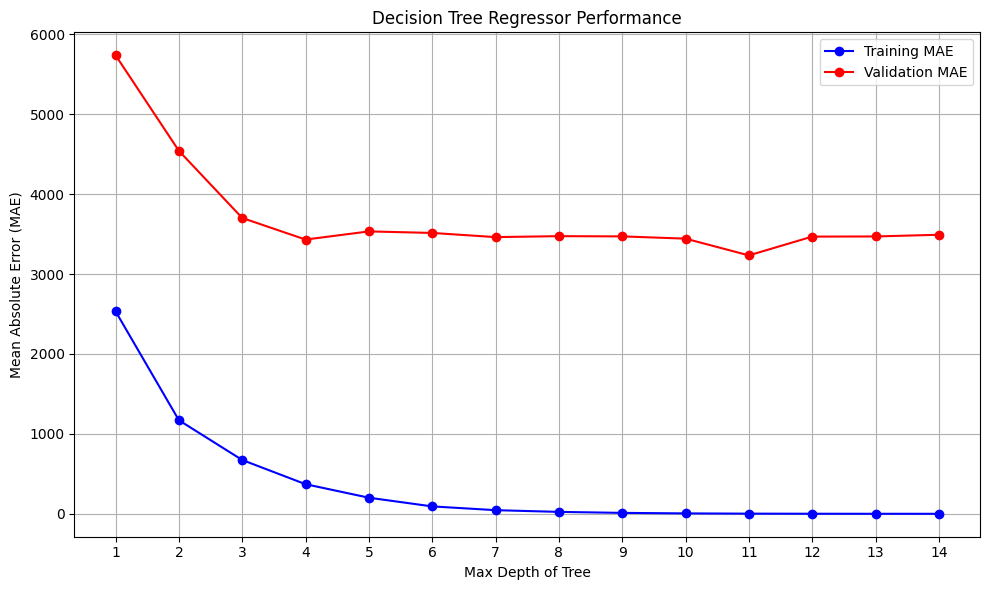

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Initialize lists to store MAE values
train_mae_list = []
val_mae_list = []
depths = range(1, 15)  # Test depths from 1 to 14

# Iterate over different depths and train the model
for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=1)
    model.fit(train_X, train_y)
    
    # Make predictions
    train_predictions = model.predict(train_X)
    val_predictions = model.predict(val_X)
    
    train_mae = mean_absolute_error(train_predictions, train_y)
    val_mae = mean_absolute_error(val_predictions, val_y)
    
    train_mae_list.append(train_mae)
    val_mae_list.append(val_mae)

plt.figure(figsize=(10, 6))
plt.plot(depths, train_mae_list, marker='o', linestyle='-', color='b', label='Training MAE')
plt.plot(depths, val_mae_list, marker='o', linestyle='-', color='r', label='Validation MAE')
plt.title('Decision Tree Regressor Performance')
plt.xlabel('Max Depth of Tree')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
